In [33]:
import pandas as pd

In [34]:
df = pd.read_excel("../kospi.xlsx", usecols=[0,1,2,3,4], index_col='Date')
df.head(1)

,Close,Open,High,Low
Date,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59


In [35]:
# 변동 파생변수
df['change'] = df['High'] - df['Low']
df.head(1)

,Close,Open,High,Low,change
Date,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59


In [36]:
# 전일변동 파생변수
df['전일변동'] = df['change'].shift()
df.head()

,Close,Open,High,Low,change,전일변동
Date,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32


In [37]:
# 목표가 = 시간 + 전일변동 * 0.5
df['목표가'] = df['Open'] + df['전일변동'] * 0.5
df.head()

,Close,Open,High,Low,change,전일변동,목표가
Date,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330


1. 목표가보다 고가가 높으면 목표가로 매수
2. 수익률 -> 종가 - 목표가 / 목표가 + 1
3. 그 외의 수익률은 1

In [38]:
import numpy as np

In [39]:
acc_rtn = 1
for i in df.index:
    if df.loc[i, 'High'] > df.loc[i, '목표가']:
        rtn = (df.loc[i, 'Close'] - df.loc[i,'목표가'])/ df.loc[i, '목표가'] + 1
        df.loc[i, '수익율'] = rtn
    else:
        rtn = 1
        df.loc[i, '수익율'] = rtn

    acc_rtn *= rtn    
    df.loc[i, '누적수익율'] = acc_rtn

In [40]:
df.tail()

,Close,Open,High,Low,change,전일변동,목표가,수익율,누적수익율
Date,,,,,,,,,
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280
2021-08-26,3128.53,3151.30,3159.37,3121.04,38.33,36.75,3169.675,1.000000,5.237280
2021-08-27,3133.90,3116.29,3143.01,3106.97,36.04,38.33,3135.455,0.999504,5.234682


In [41]:
# np.where(조건식, 참인경우 값, 거짓인 경우 값)
df['수익율2'] = np.where(df['High'] >= df['목표가'], (df['Close']- df['목표가']) / df['목표가']+ 1, 1)

In [42]:
(df['수익율'] == df['수익율2']).value_counts()

True    5349
Name: count, dtype: int64

In [43]:
# 누적수익율
# 누적곱 -> cumprod()
df['누적수익율2'] = df['수익율2'].cumprod()

In [44]:
(df['누적수익율'] == df['누적수익율2']).value_counts()

True    5349
Name: count, dtype: int64

In [45]:
## CARG -> 연복리수익율
## 누적수익율 ** (1- (투자기간/365)) - 1
# 시계열데이터를 이용하여 기간
delta = df.index[-1] - df.index[0]
delta.days

7906

In [46]:
year = delta.days/365
CARG = df['누적수익율'].iloc[-1] ** (1/year) - 1
print('CARG :', CARG * 100)

CARG : 7.941722848934241


In [47]:
import matplotlib.pyplot as plt
import platform

if platform.system == 'Darwin':
    plt.rc('font', family ='AppleGothic')
else:
    plt.rc('font', family ='Malgun Gothic')

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Users/noseohyeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/noseohyeong/Library/Python/3.9/lib/python

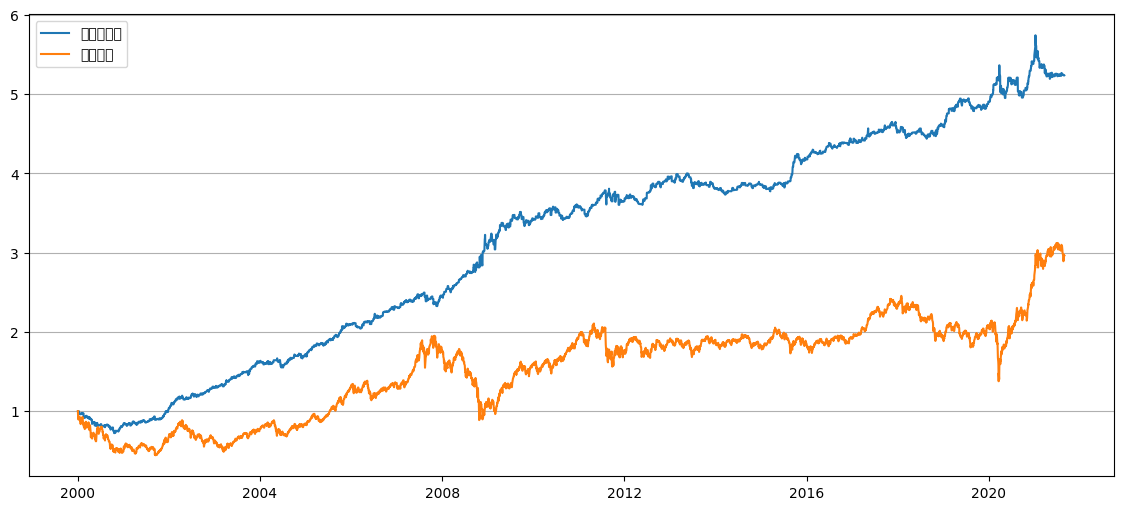

In [48]:
# 변동성돌파전략의 누적 수익율 라인그래프 표시
# 바이앤홀드 누적수익율 라인 그래프 표시

plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(df['누적수익율'], label='변동성돌파')
plt.plot(df['Close'] / df['Close'].iloc[0], label= '단순보유')
plt.legend()
plt.show()


In [49]:
# DD = (1 - 누적수익율 / 전고점) * 100
df['전고점'] = df['누적수익율'].cummax()
df['DD'] = (1 - df['누적수익율'] / df['전고점']) * 100
df.tail()

,Close,Open,High,Low,change,전일변동,목표가,수익율,누적수익율,수익율2,누적수익율2,전고점,DD
Date,,,,,,,,,,,,,
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419
2021-08-26,3128.53,3151.30,3159.37,3121.04,38.33,36.75,3169.675,1.000000,5.237280,1.000000,5.237280,5.739762,8.754419
2021-08-27,3133.90,3116.29,3143.01,3106.97,36.04,38.33,3135.455,0.999504,5.234682,0.999504,5.234682,5.739762,8.799672


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

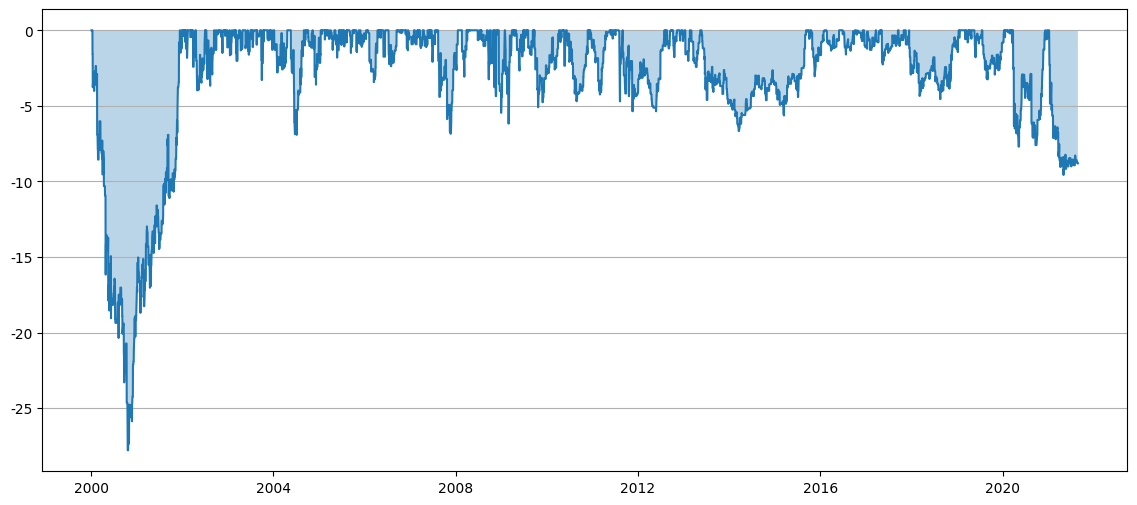

In [50]:
# 음수를 표시
plt.rc('axes', unicode_minus =  False)

plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(-df['DD'])
plt.fill_between(df.index, -df['DD'], alpha =0.3)
plt.show()

In [51]:
print('MDD : ', df['DD'].max())

MDD :  27.779726849588627


In [52]:
# 이동평균선 10일치
df['MA10'] = df['Close'].rolling(10).mean()
df.head()

,Close,Open,High,Low,change,전일변동,목표가,수익율,누적수익율,수익율2,누적수익율2,전고점,DD,MA10
Date,,,,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,NaN
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.0,1.0,1.0,1.0,1.0,0.0,NaN
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.0,1.0,1.0,1.0,1.0,0.0,NaN
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.0,1.0,1.0,1.0,1.0,0.0,NaN
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.0,1.0,1.0,1.0,1.0,0.0,NaN


In [53]:
df['매매신호'] = df['Open'] > df['MA10'].shift(1)

In [54]:
df.head()

,Close,Open,High,Low,change,전일변동,목표가,수익율,누적수익율,수익율2,누적수익율2,전고점,DD,MA10,매매신호
Date,,,,,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,NaN,False
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.0,1.0,1.0,1.0,1.0,0.0,NaN,False
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.0,1.0,1.0,1.0,1.0,0.0,NaN,False
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.0,1.0,1.0,1.0,1.0,0.0,NaN,False
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.0,1.0,1.0,1.0,1.0,0.0,NaN,False


In [55]:
# 수익률 계산 방법 -> 매매신호가 1이고, 고가가 목표가보다 높은 경우
df['수익율2'] = np.where(
    (df['매매신호'] == 1) & (df['High'] >= df['목표가']),
    df['Close']/df['목표가'],
    1
)

In [57]:
# 누적수익률
df['누적수익율2'] = df['수익율2'].cumprod()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

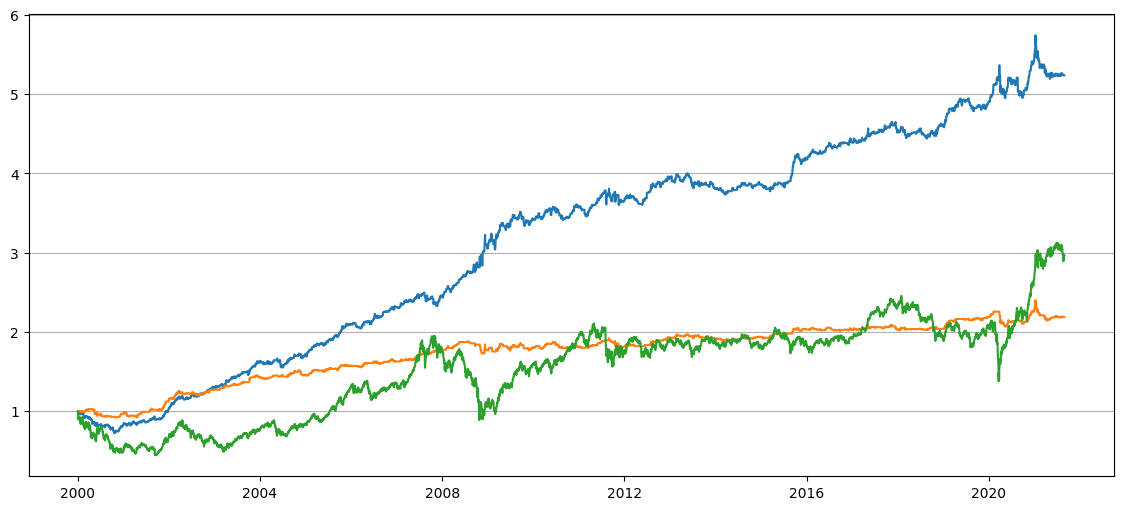

In [58]:
plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(df['누적수익율'],label='변동성돌파')
plt.plot(df['누적수익율2'], label='변동성돌파(마켓)')
plt.plot(df['Close'] / df['Close'].iloc[0], label = '단순보유')
plt.legend
plt.show()

In [60]:
df['전고점2'] = df['누적수익율2'].cummax()
df['DD2']= (1 - df['누적수익율2'] / df['전고점2']) * 100

In [61]:
print('MDD2 :', df['DD2'].max())

MDD2 : 10.556892232762005


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

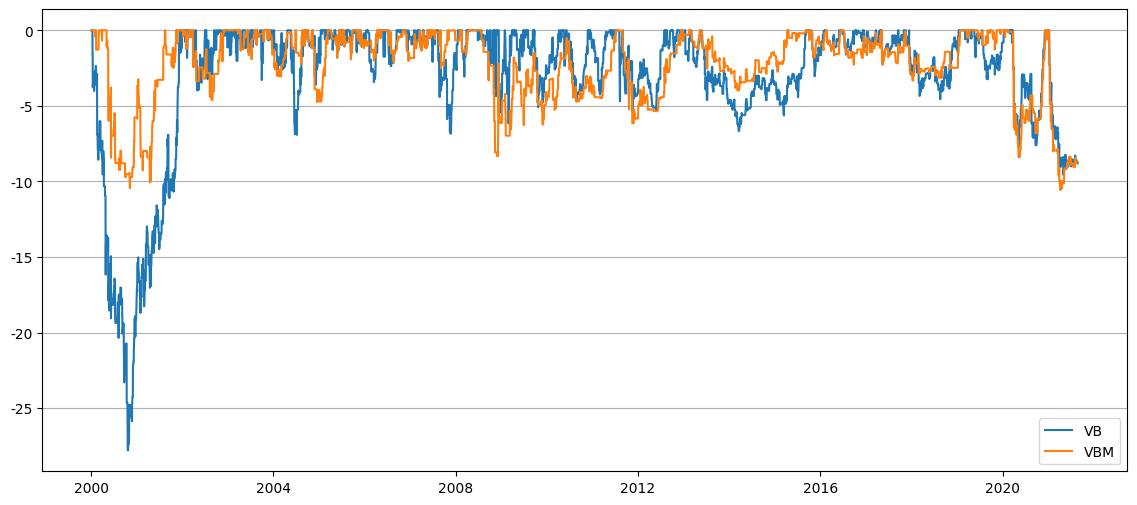

In [62]:
plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(-df['DD'], label='VB')
plt.plot(-df['DD2'], label = 'VBM')
plt.legend()
plt.show()